In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [30]:
df = pd.read_csv('MaterialStrength.csv')

In [31]:
df.head(10)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,target_feature
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,0.300000,540.0,1.538462,1,0.350044,YEs,NO,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,0.300000,540.0,1.560651,1,0.452416,yES,nOO,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,0.685714,475.0,1.569024,0,6.704743,yEs,NO,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,0.685714,475.0,1.569024,0,8.891596,yes,NOO,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,0.966767,331.0,1.185221,0,8.126411,YeS,no,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,0.857143,380.0,1.391045,0,1.913672,YES,nO,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,0.600000,475.0,1.569024,0,8.352403,Yes,No,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,0.600000,475.0,1.569024,0,0.768176,Y E S,Noo,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,0.857143,380.0,1.391045,0,0.610687,yES,nOO,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,0.480000,475.0,1.569024,0,0.712650,Yes,nOO,39.29


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   x1              1030 non-null   float64
 1   x2              1030 non-null   float64
 2   x3              1030 non-null   float64
 3   x4              1030 non-null   float64
 4   x5              1030 non-null   float64
 5   x6              1030 non-null   float64
 6   x7              1030 non-null   float64
 7   x8              1030 non-null   int64  
 8   x9              1030 non-null   float64
 9   x10             1030 non-null   float64
 10  x11             1030 non-null   float64
 11  x12             1030 non-null   int64  
 12  x13             1030 non-null   float64
 13  x14             1030 non-null   object 
 14  x15             1030 non-null   object 
 15  target_feature  1030 non-null   float64
dtypes: float64(12), int64(2), object(2)
memory usage: 128.9+ KB


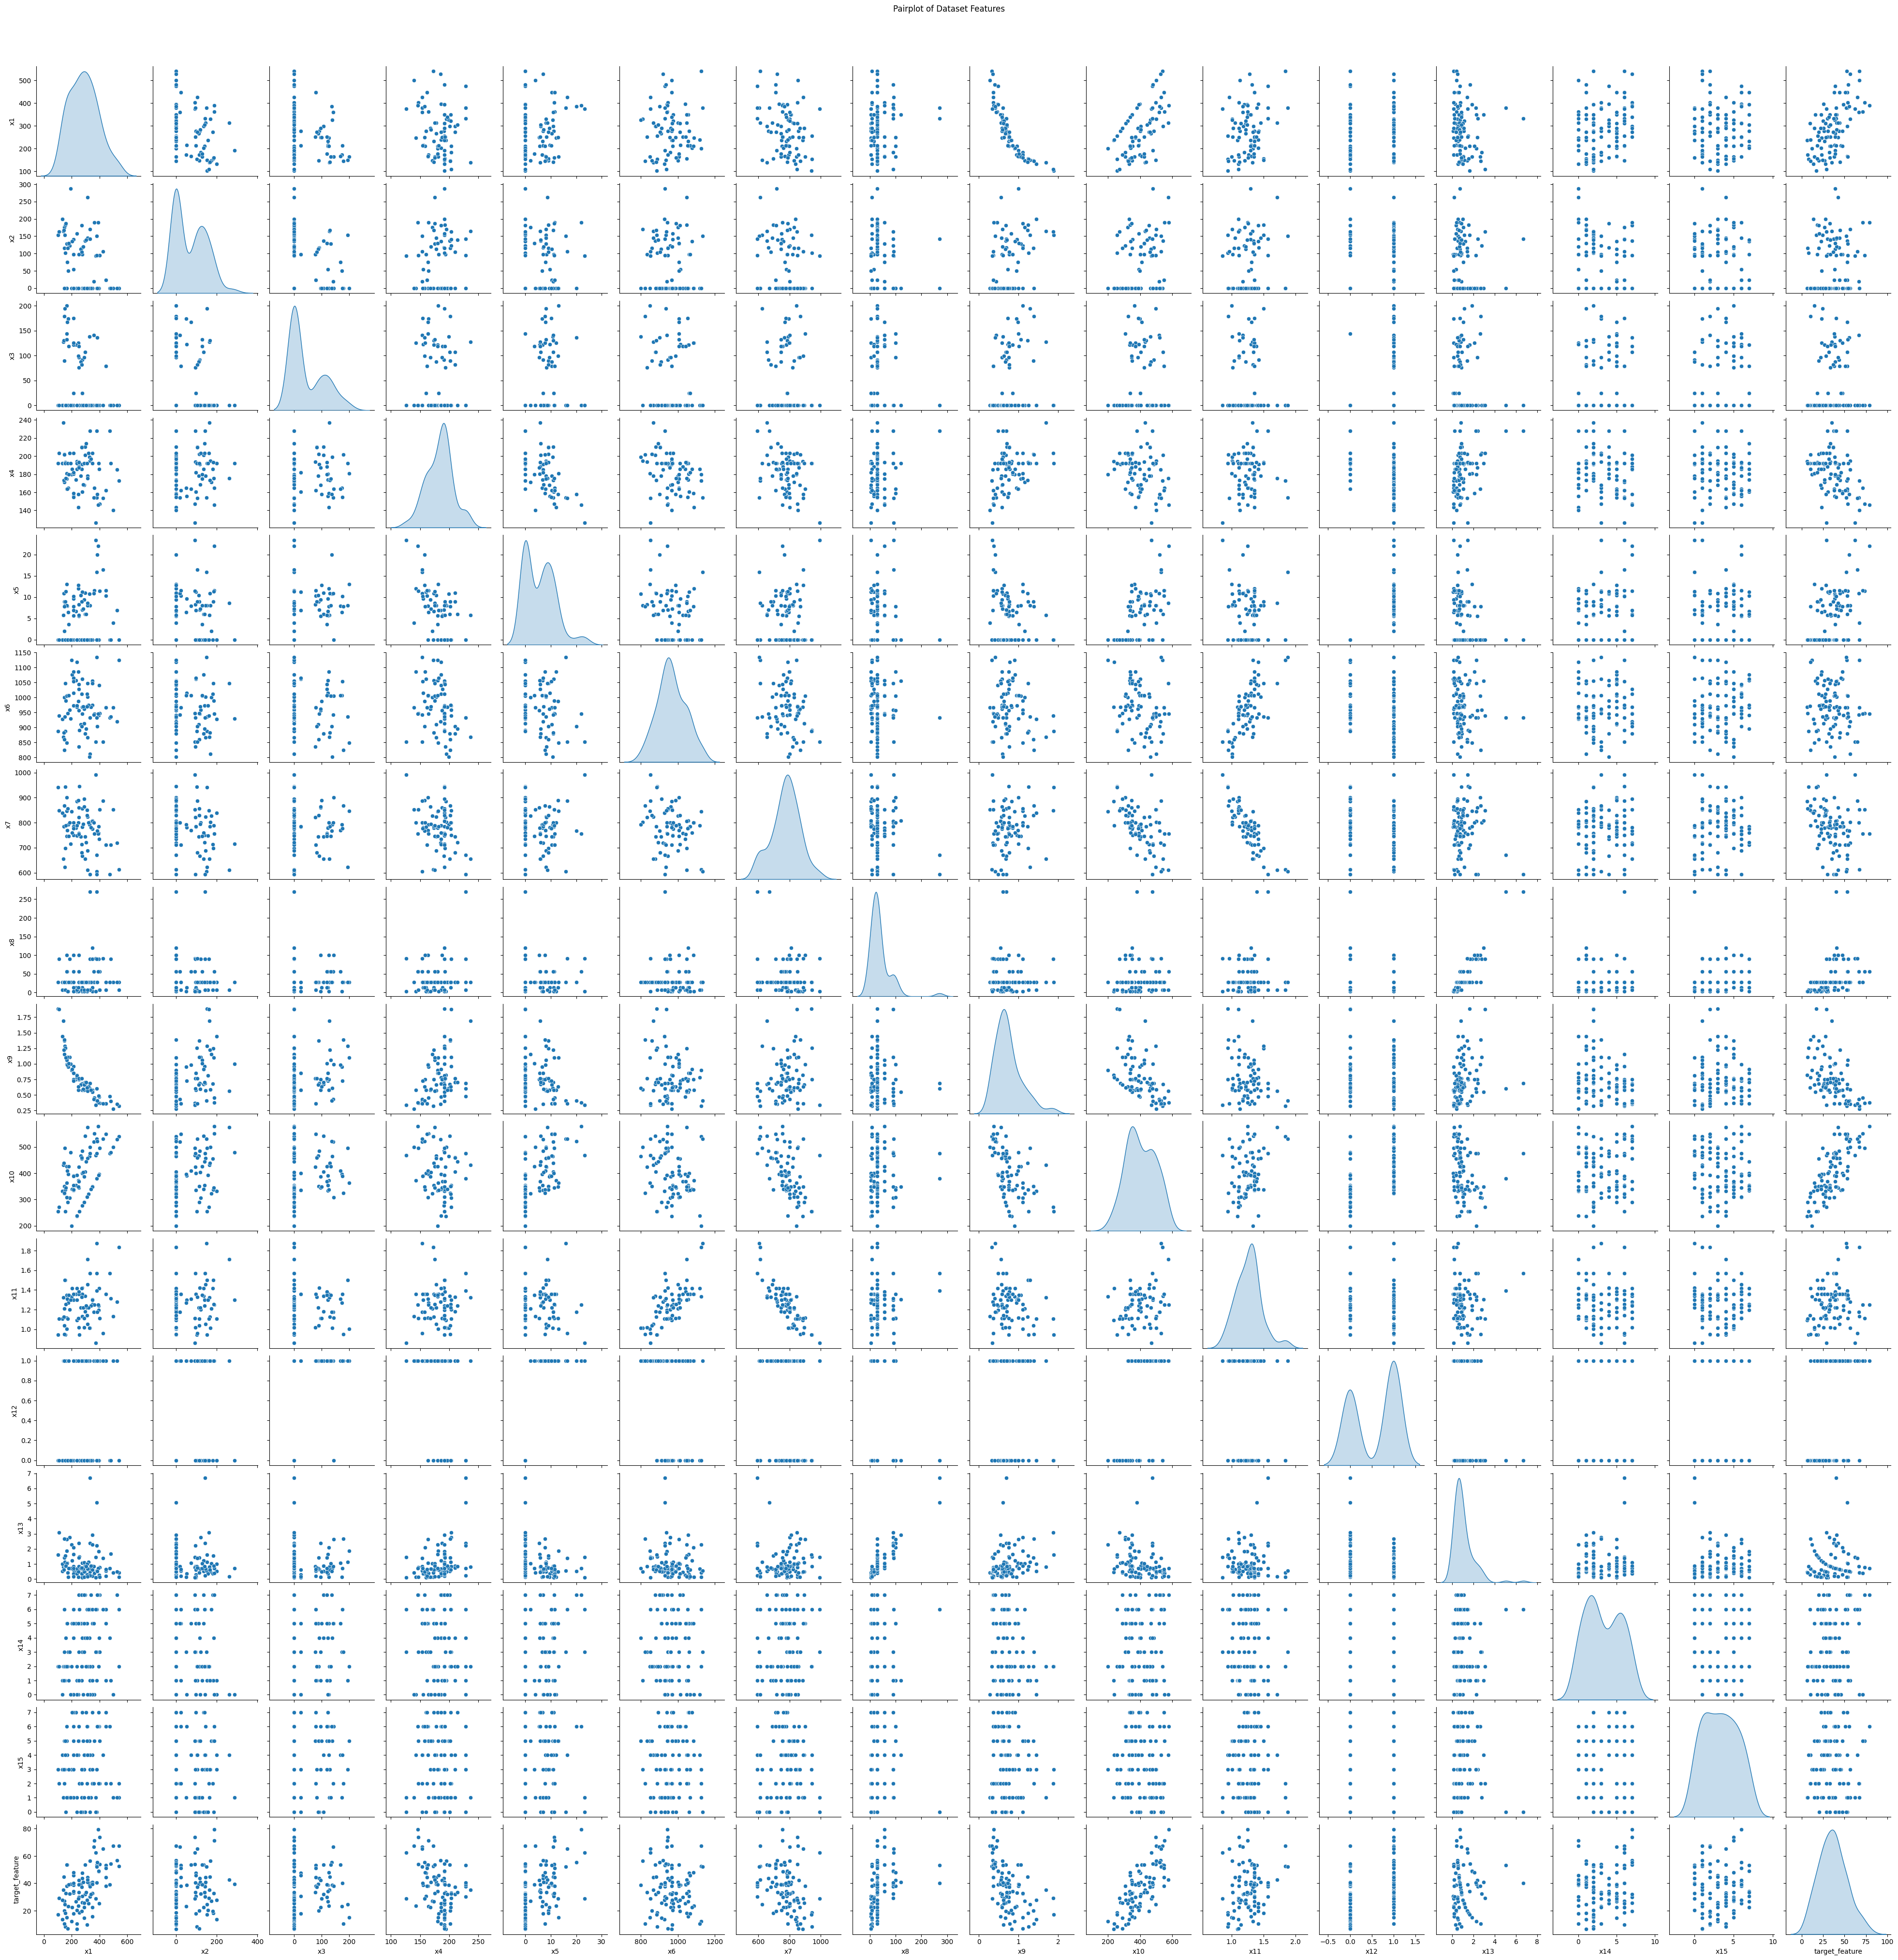

In [21]:
# Pairplot for feature relationships
sns.pairplot(df.sample(100), diag_kind='kde')  # Sampling for better performance in visualization
plt.suptitle("Pairplot of Dataset Features", y=1.02)
plt.show()

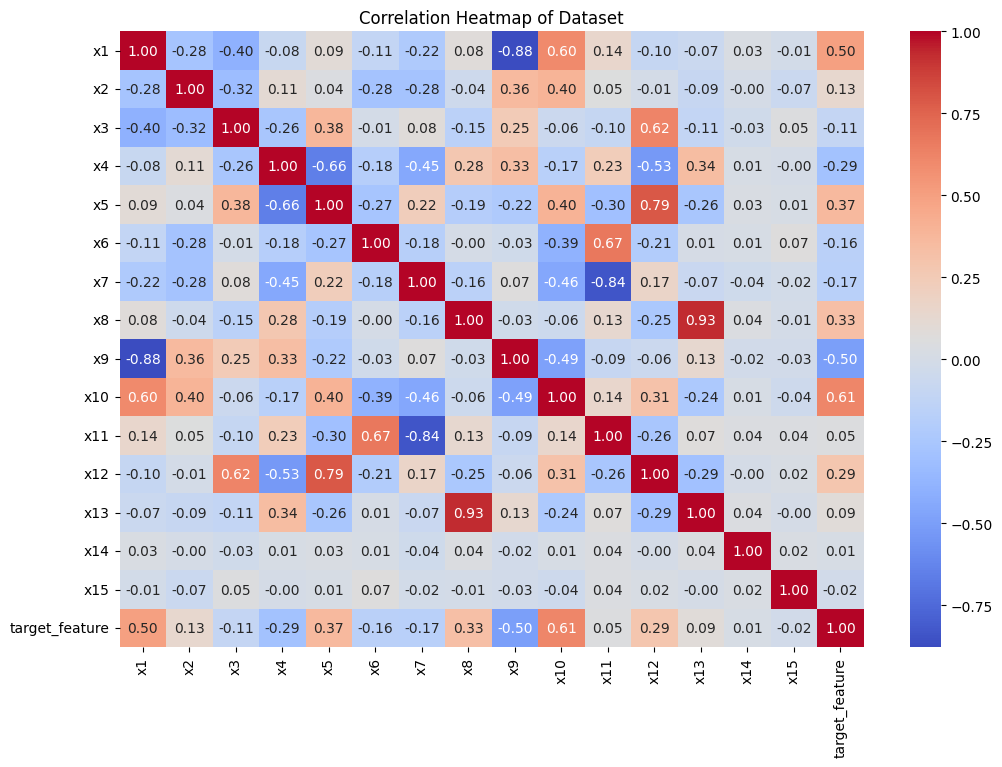

In [22]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap of Dataset")
plt.show()

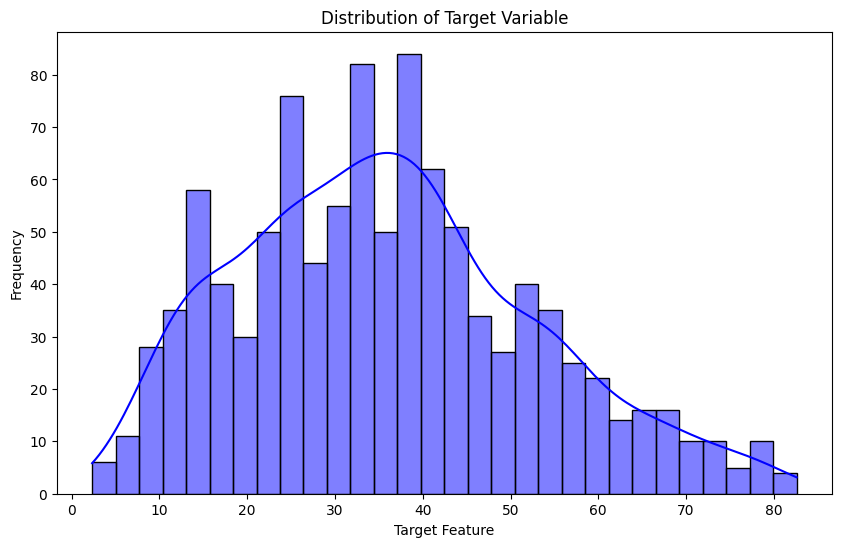

In [23]:
# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True, bins=30, color='blue')
plt.title("Distribution of Target Variable")
plt.xlabel("Target Feature")
plt.ylabel("Frequency")
plt.show()

In [32]:
# Handle categorical columns (`x14` and `x15`) with Label Encoding
categorical_columns = ['x14', 'x15']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

In [33]:
# Check for missing values and handle them (e.g., fill with mean for numerical columns)
df.fillna(df.mean(), inplace=True)

In [34]:
# Separate features and target
X = df.drop(columns=['target_feature'])
y = df['target_feature']

In [35]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
# Bin target values into discrete categories for classification
bins = np.linspace(y.min(), y.max(), 4)  # Divide target into 3 categories
labels = ['Low', 'Medium', 'High']
y_binned = pd.cut(y, bins=bins, labels=labels, include_lowest=True)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_binned, test_size=0.2, random_state=42
)

In [53]:
# Define hyperparameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel types
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}

# Set up GridSearchCV
svm_grid = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')
svm_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [54]:
# Best parameters and score
best_params = svm_grid.best_params_
best_score = svm_grid.best_score_

In [55]:
# Train the best model on the training set
best_svm = svm_grid.best_estimator_
best_svm.fit(X_train, y_train)

SVC(C=100, kernel='linear', random_state=42)

In [56]:
# Predictions with the best model
y_pred_best = best_svm.predict(X_test)

In [57]:
# Generate classification report and confusion matrix for the best model
classification_rep_best = classification_report(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best, labels=labels)

Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Score: 0.9587065779748706

Classification Report:
               precision    recall  f1-score   support

        High       1.00      0.83      0.90        23
         Low       0.97      1.00      0.99        67
      Medium       0.97      0.98      0.97       116

    accuracy                           0.97       206
   macro avg       0.98      0.94      0.95       206
weighted avg       0.97      0.97      0.97       206



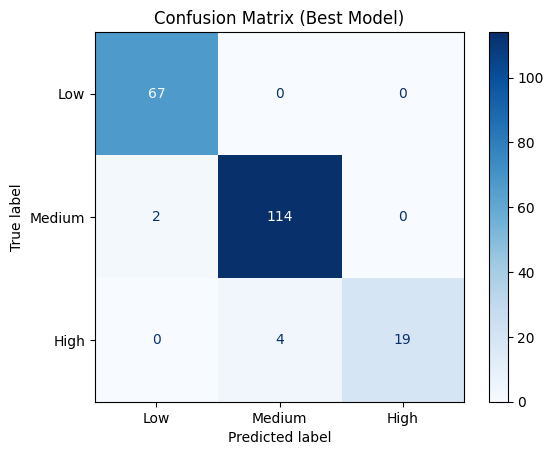

In [59]:
# Display results
print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)
print("\nClassification Report:\n", classification_rep_best)

# Plot confusion matrix for the best model
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_best, display_labels=labels)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Best Model)")
plt.show()

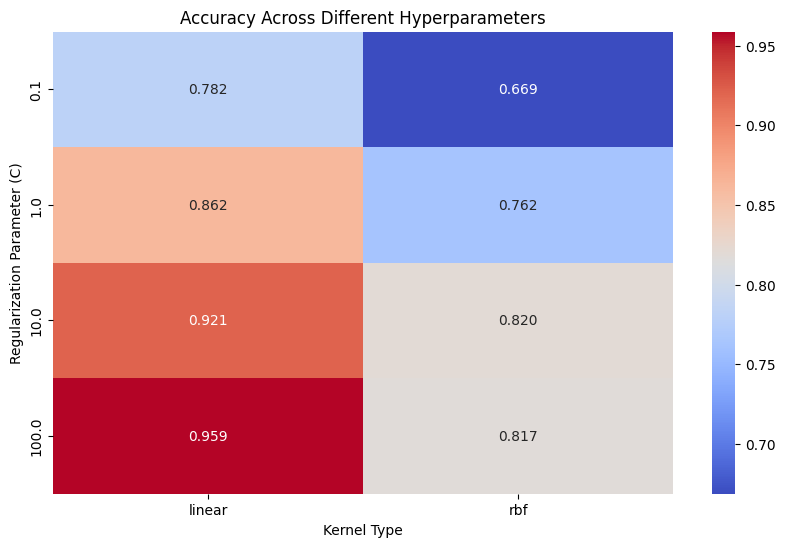

In [61]:
# Visualize the effect of hyperparameters on accuracy
cv_results = pd.DataFrame(svm_grid.cv_results_)
heatmap_data = cv_results.pivot_table(
    values="mean_test_score", 
    index="param_C", 
    columns="param_kernel"
)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap='coolwarm')
plt.title("Accuracy Across Different Hyperparameters")
plt.xlabel("Kernel Type")
plt.ylabel("Regularization Parameter (C)")
plt.show()

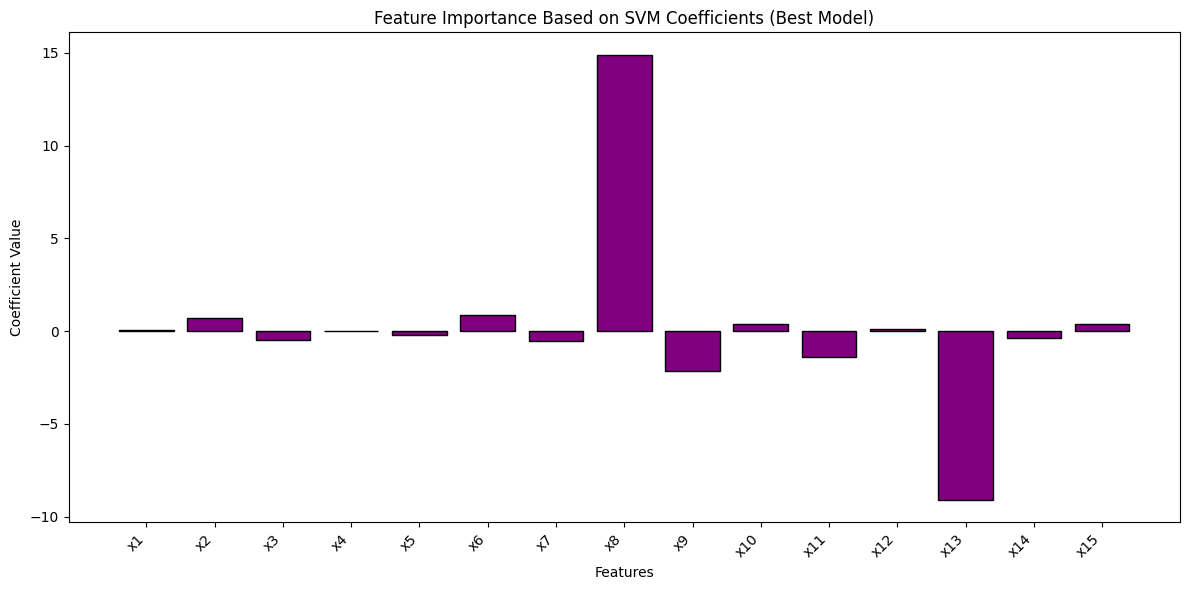

In [ ]:
# Visualize feature importance using coefficients from the best linear SVM model
if best_params['kernel'] == 'linear':
    feature_importance = best_svm.coef_[0]
    feature_names = df.drop(columns=['target_feature']).columns

    plt.figure(figsize=(12, 6))
    plt.bar(feature_names, feature_importance, color='purple', edgecolor='black')
    plt.title("Feature Importance Based on SVM Coefficients (Best Model)")
    plt.xlabel("Features")
    plt.ylabel("Coefficient Value")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Feature importance visualization is only available for linear kernel SVM.")
